### **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import ADASYN

### **Import Kaggle Dataset**

In [2]:
df = pd.read_csv("../input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv")
df.head(10) #print first 10 entries of the dataset

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


### **Inspect the dataset**

In [3]:
print(df.shape)

(858, 36)


In [4]:
print(df.dtypes)

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [5]:
print(df.describe())

              Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000  

In [6]:
df = df.replace('?', np.NaN) #replacing missing values with Numpy NaN
print(df.isnull().sum())

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

### **Identifying the percentage of missing values in each risk factor**

<AxesSubplot:>

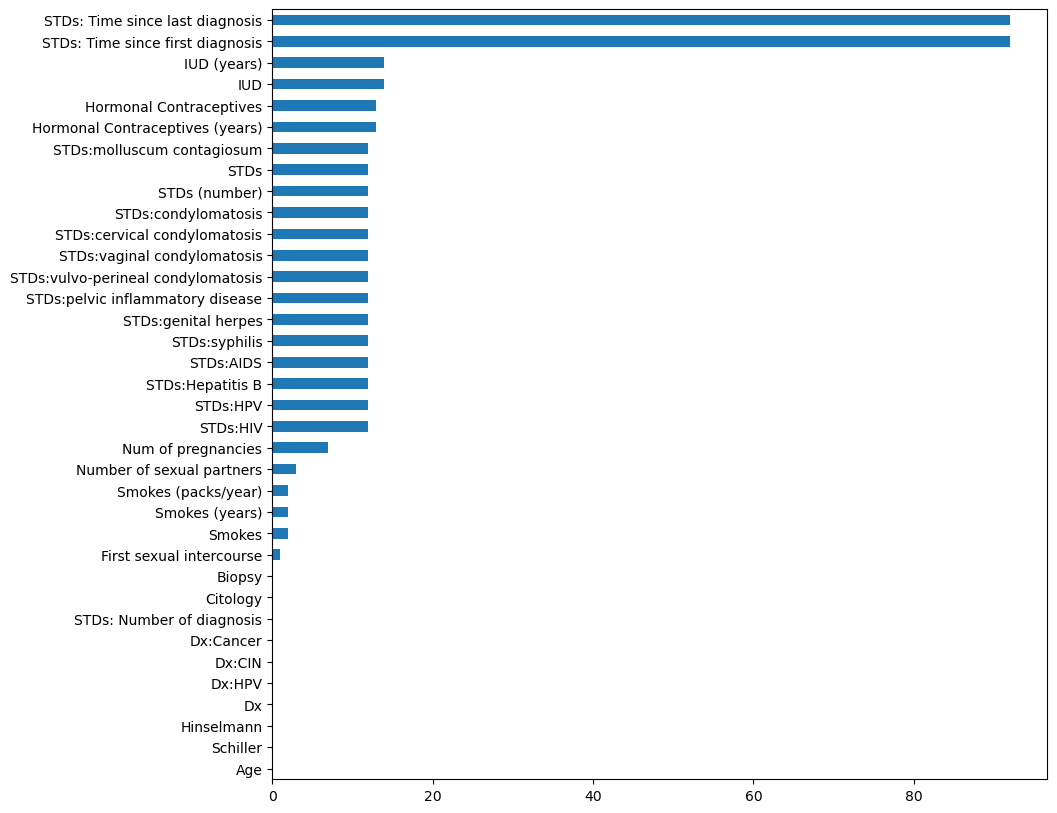

In [7]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

#### **Now, columns STDs: Time since last diagnosis and STDs: Time since first diagnoses have a lot of missing values so we drop them as they won't be helpful in training the model.**

In [8]:
new_df = df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis','Hinselmann','Schiller','Citology','Biopsy'],axis=1) #target varible columns have also been removed before imputation
print(new_df.shape)
new_df.head()

(858, 30)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


#### **Assigning numerical and categorical columns manually**

In [9]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx']

## **Data Preprocessing: Dealing with missing values**

### **Imputing the numerical columns with median**

In [10]:
for feature in numerical_df:
    print(feature, '', pd.to_numeric(new_df[feature], errors='coerce').median())
    feature_median = round(pd.to_numeric(new_df[feature], errors='coerce').median(), 1)
    new_df[feature] = pd.to_numeric(new_df[feature], errors='coerce').fillna(feature_median)
new_df.head(20)

Age  25.0
Number of sexual partners  2.0
First sexual intercourse  17.0
Num of pregnancies  2.0
Smokes (years)  0.0
Smokes (packs/year)  0.0
Hormonal Contraceptives (years)  0.5
IUD (years)  0.0
STDs (number)  0.0


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1
9,44,3.0,15.0,2.0,1.0,1.266973,2.8,0.0,0.00,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


### **Imputing the categorical columns with mode**

In [11]:
for feature in categorical_df:
    print(feature, '', new_df[feature].mode()[0])
    feature_mode = new_df[feature].mode()[0]
    new_df[feature] = new_df[feature].fillna(feature_mode)
new_df.head(20)

Smokes  0.0
Hormonal Contraceptives  1.0
IUD  0.0
STDs  0.0
STDs:condylomatosis  0.0
STDs:cervical condylomatosis  0.0
STDs:vaginal condylomatosis  0.0
STDs:vulvo-perineal condylomatosis  0.0
STDs:syphilis  0.0
STDs:pelvic inflammatory disease  0.0
STDs:genital herpes  0.0
STDs:molluscum contagiosum  0.0
STDs:AIDS  0.0
STDs:HIV  0.0
STDs:Hepatitis B  0.0
STDs:HPV  0.0
STDs: Number of diagnosis  0
Dx:Cancer  0
Dx:CIN  0
Dx:HPV  0
Dx  0


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1
9,44,3.0,15.0,2.0,1.0,1.266973,2.8,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


## **Data Preprocessing: Removing outliers**

#### **The dataset that we have doesn't require removing outliers but still we can do it just to show that outliers can be removed as well**

#### **First we calculate the Coefficient of Variance of the numerical columns just to get an idea of how dispersed the data in the columns is**

In [12]:
numerical_columns = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)',
                     'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)']

cv_dict = {}

for column in numerical_columns:
    mean = new_df[column].mean()
    std_dev = new_df[column].std()
    cv = std_dev / mean * 100
    cv_dict[column] = cv

print("Coefficient of variation for each numerical column:")
for key, value in cv_dict.items():
    print(f"{key}: {value:.2f}%")

Coefficient of variation for each numerical column:
Age: 31.68%
Number of sexual partners: 65.49%
First sexual intercourse: 16.43%
Num of pregnancies: 62.06%
Smokes (years): 338.04%
Smokes (packs/year): 495.29%
Hormonal Contraceptives (years): 175.26%
IUD (years): 408.05%
STDs (number): 341.66%


#### **Now, Smokes (packs/year) has the largest CV so we will remove its outliers**

#### **Making a violin plot of Age vs Smokes (packs/year) (before removing outliers)**

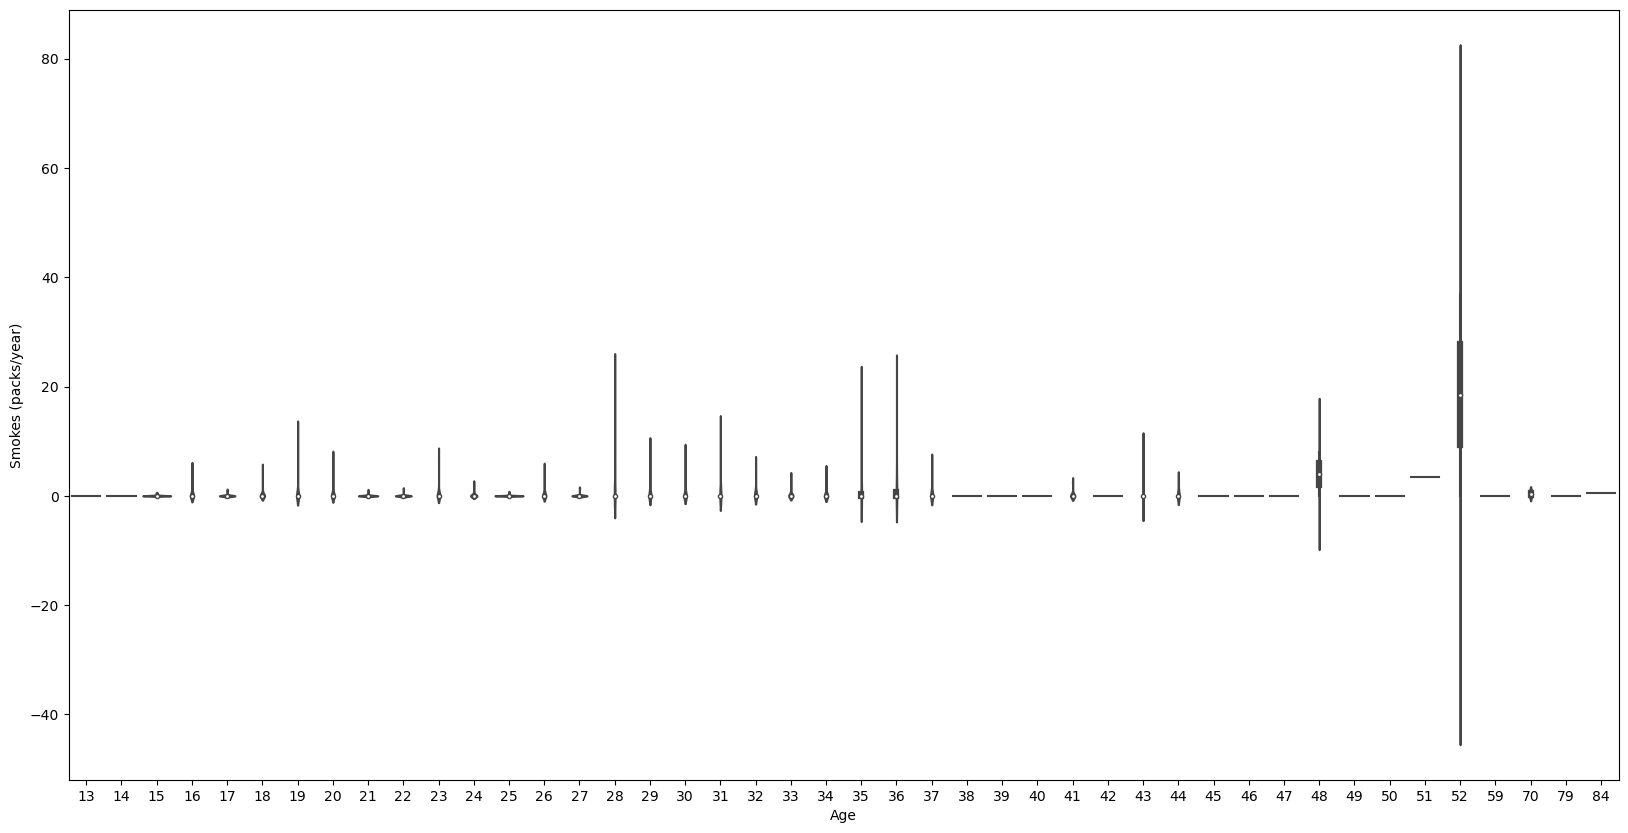

In [13]:
plt.figure(figsize=(20, 10))
# Create the violin plot for age and Smokes (packs/year)
sns.violinplot(data=new_df, x="Age", y='Smokes (packs/year)')

# Show the plot
plt.show()


### **Removing outliers in the numerical column Smokes (packs/year)**

#### (Everything above 93th percentile is considered a quartile)

In [14]:
Q3 = new_df['Smokes (packs/year)'].quantile(0.93)
new_df = new_df[new_df['Smokes (packs/year)'] <= Q3]
print(new_df.shape)


(798, 30)


#### **Making a violin plot of Age vs Smokes (packs/year) (after removing outliers)**

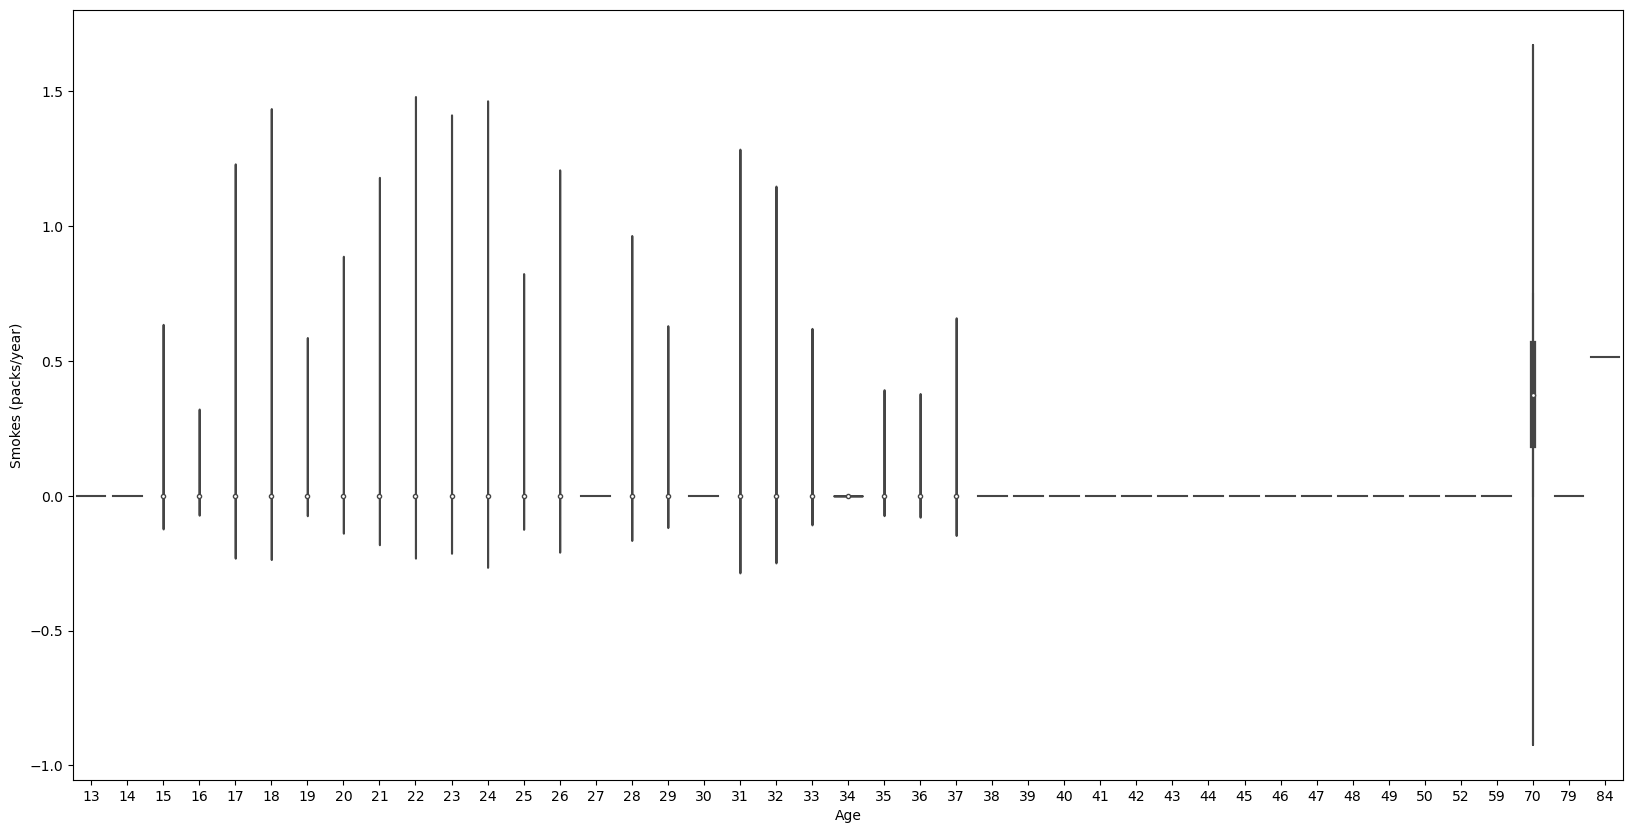

In [15]:
plt.figure(figsize=(20, 10))
# Create the violin plot for age and Smokes (packs/year) after removing outliers
sns.violinplot(data=new_df, x="Age", y='Smokes (packs/year)')
plt.show()


## **Data Preprocessing: Normalizing the data**